In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Jupyter notebook magic function to 
# display the charts in the notebook
%matplotlib inline 

In [2]:
df = pd.read_csv("/data/insurance.csv")

In [3]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Single variable plotting

### Continuous 

Text(0.5,1,'Histogram of the charges')

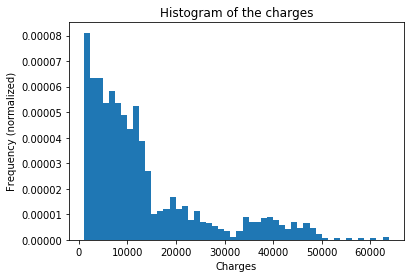

In [13]:
# Histogram
df.charges.plot.hist(bins = 50, normed = True)
plt.xlabel("Charges")
plt.ylabel("Frequency (normalized)")
plt.title("Histogram of the charges")

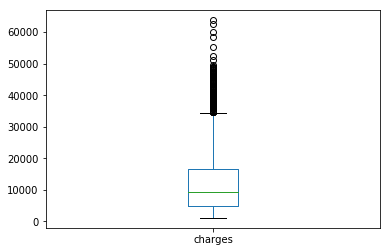

In [14]:
# Boxplot
df.charges.plot.box()

In [15]:
import numpy as np

In [27]:
q1, q2, q3 = np.percentile(df.charges, [25, 50, 75])
iqr = q3 - q1
upper_whisker = min(df.charges.max(), q3 + 1.5 * iqr)
lower_whisker = max(df.charges.min(), q1 - 1.5 * iqr)
outliers = ((df.charges > upper_whisker) 
                    | (df.charges < lower_whisker))

In [28]:
upper_whisker, lower_whisker

(34489.350562499996, 1121.8739)

In [29]:
df[outliers]

,age,gender,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
34,28,male,36.400,1,yes,southwest,51194.55914
38,35,male,36.670,1,yes,northeast,39774.27630
39,60,male,39.900,0,yes,southwest,48173.36100
49,36,male,35.200,1,yes,southeast,38709.17600
53,36,male,34.430,0,yes,southeast,37742.57570


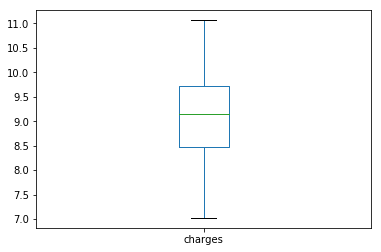

In [30]:
np.log(df.charges).plot.box()

In [31]:
# Categorical variable - frequency plot

Text(0.5,1,'Frequency plot by region')

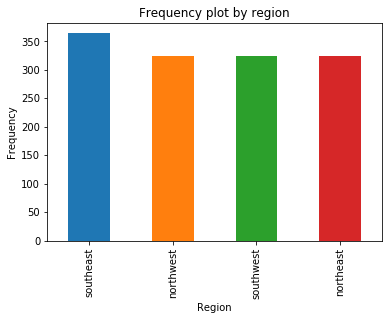

In [33]:
df.region.value_counts().plot.bar()
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Frequency plot by region")

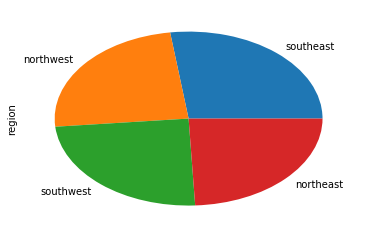

In [34]:
df.region.value_counts().plot.pie()

## Two variable association plot

Text(0.5,1,'Scatter plot of charges by bmi')

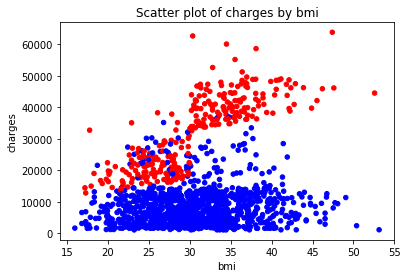

In [38]:
# continuous vs continuous
colors = np.where(df.smoker == "yes", "red", "blue")
df.plot.scatter("bmi", "charges", color = colors)
plt.title("Scatter plot of charges by bmi")

Text(0.5,1,'Median charges by region')

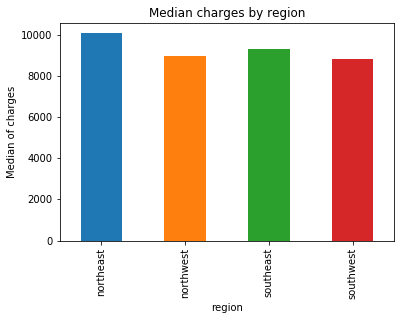

In [46]:
# Continuous vs categorical
df.groupby("region").charges.median().plot.bar()
plt.ylabel("Median of charges")
plt.title("Median charges by region")

import seaborn as sns

Open Start > Anaconda > anaconda prompt and run the following command

$ pip install seaborb

In [50]:
# Categorical vs categorical (title plot or heat map)
agg = df.pivot_table(values="charges", index="gender", columns="region")
agg

region,northeast,northwest,southeast,southwest
gender,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


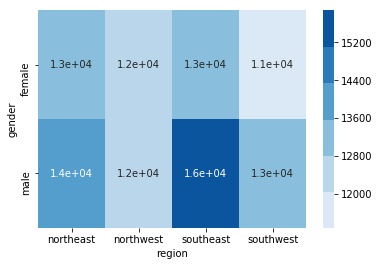

In [53]:
sns.heatmap(agg, annot=True, cmap=sns.color_palette("Blues"))